### Importing Libraries

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [84]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score


### Load Dataset

In [85]:
df = pd.read_csv('Leads.csv')

In [86]:
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### EDA 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [88]:
df.shape

(9240, 37)

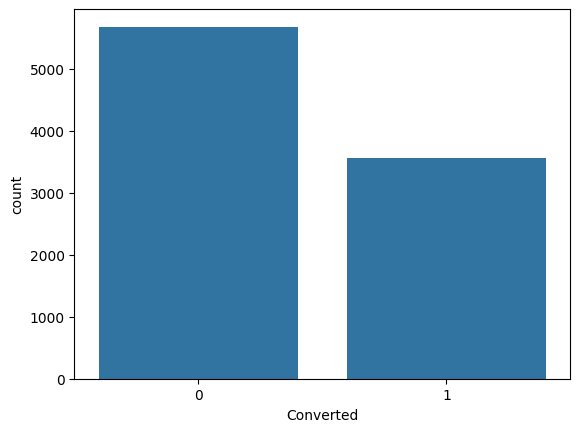

In [89]:
sns.countplot(x='Converted', data=df)

plt.show()

### Looking at above plot we can say that data is not imbalanced

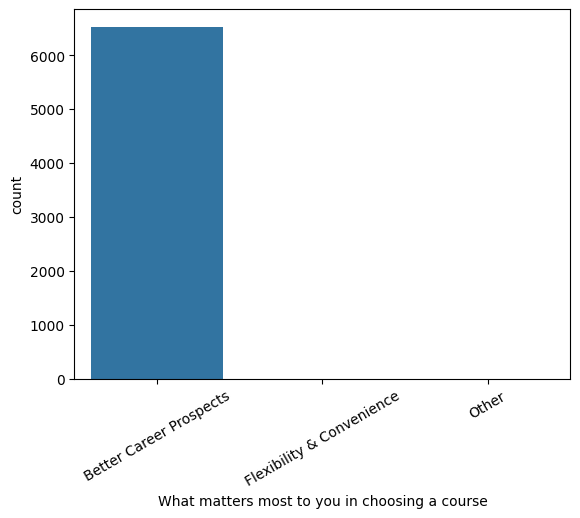

In [90]:
sns.countplot(x='What matters most to you in choosing a course', data=df)
plt.xticks(rotation=30)
plt.show()

### In What matters most to you in choosing a course column all values are Better career prospects

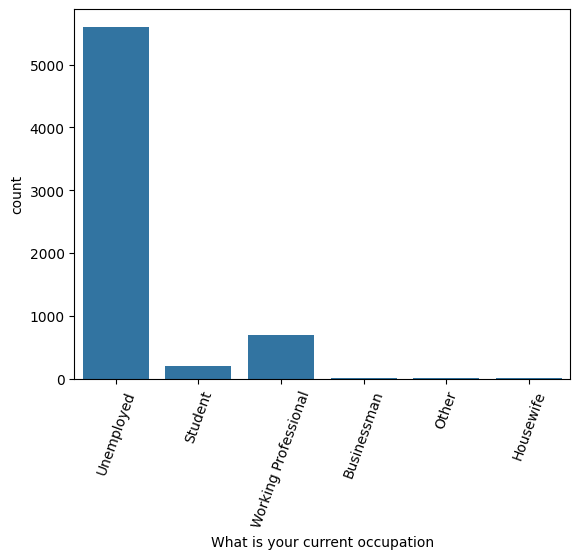

In [91]:
sns.countplot(x='What is your current occupation', data=df)
plt.xticks(rotation=70)
plt.show()

### Almost all applicant for course are unemployed

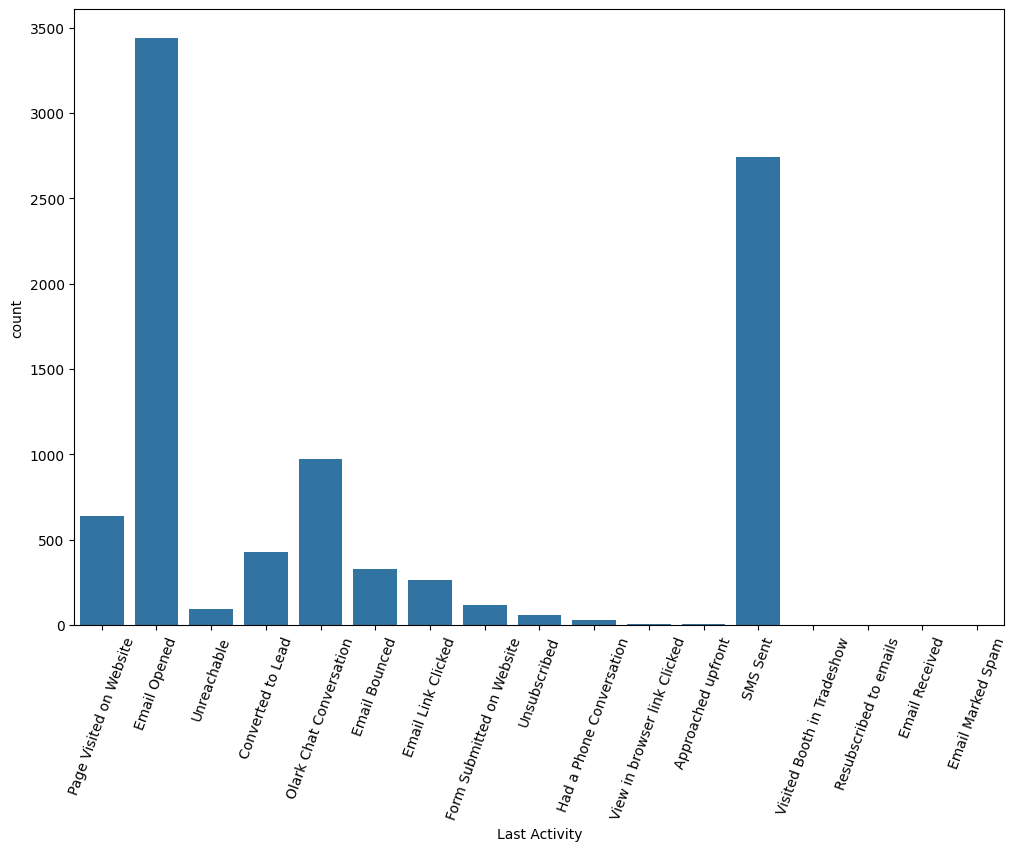

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(x='Last Activity', data=df)
plt.xticks(rotation=70)
plt.show()

### Mostly Last Activity of each applicant is Email Opened and SMS Sent

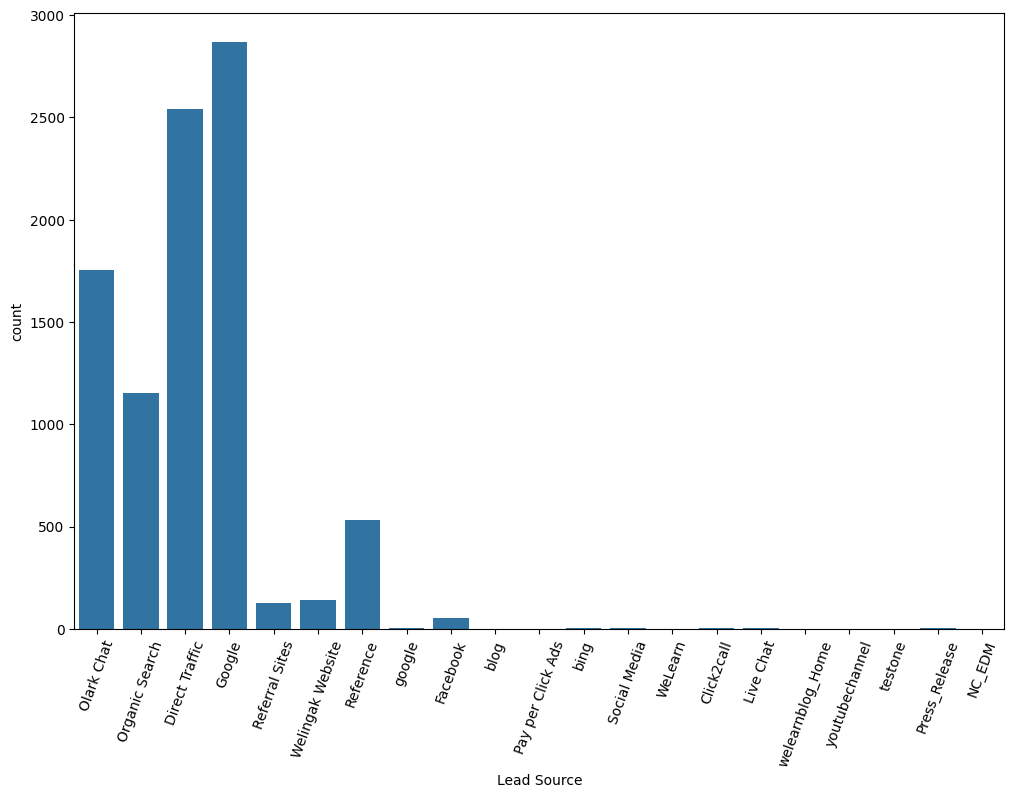

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(x='Lead Source', data=df)
plt.xticks(rotation=70)
plt.show()

### People reaching for this course are mostly through Oraganic Search,Direct Traffic and Google.

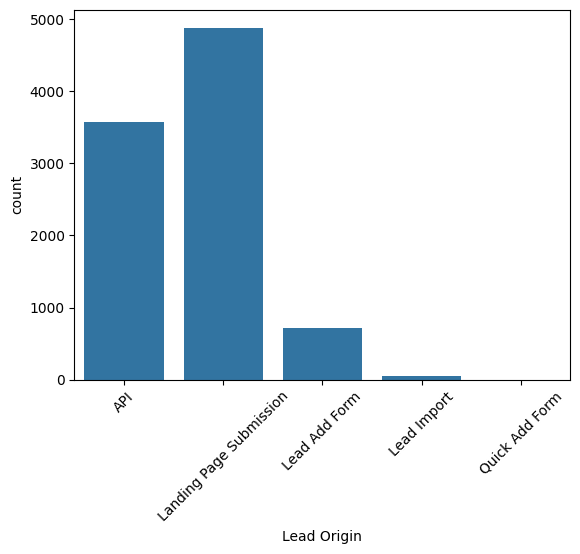

In [94]:
sns.countplot(x='Lead Origin', data=df)
plt.xticks(rotation=45)
plt.show()

### Mostly the customers are added through API and Landing Page Submission

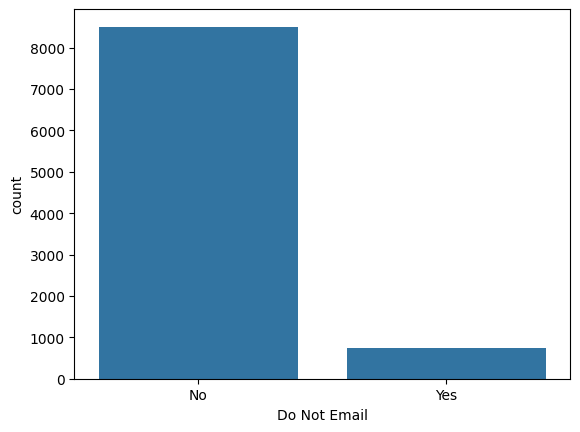

In [95]:
sns.countplot(x='Do Not Email', data=df)

plt.show()

### Customer who said No to Do Not Email are more in our data


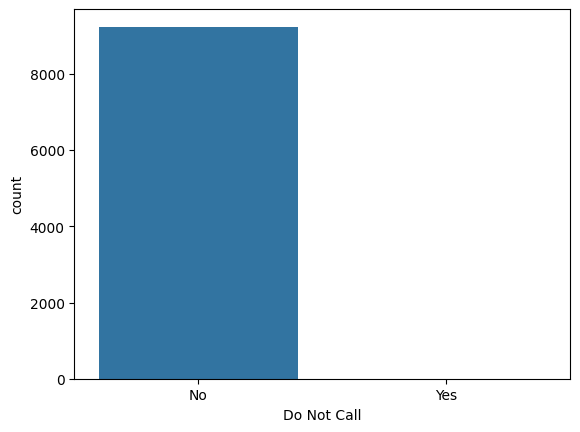

In [96]:
sns.countplot(x='Do Not Call', data=df)

plt.show()

### Customer who said No to Do Not Call are more in our data

### For numerical data we are ploting pairplot

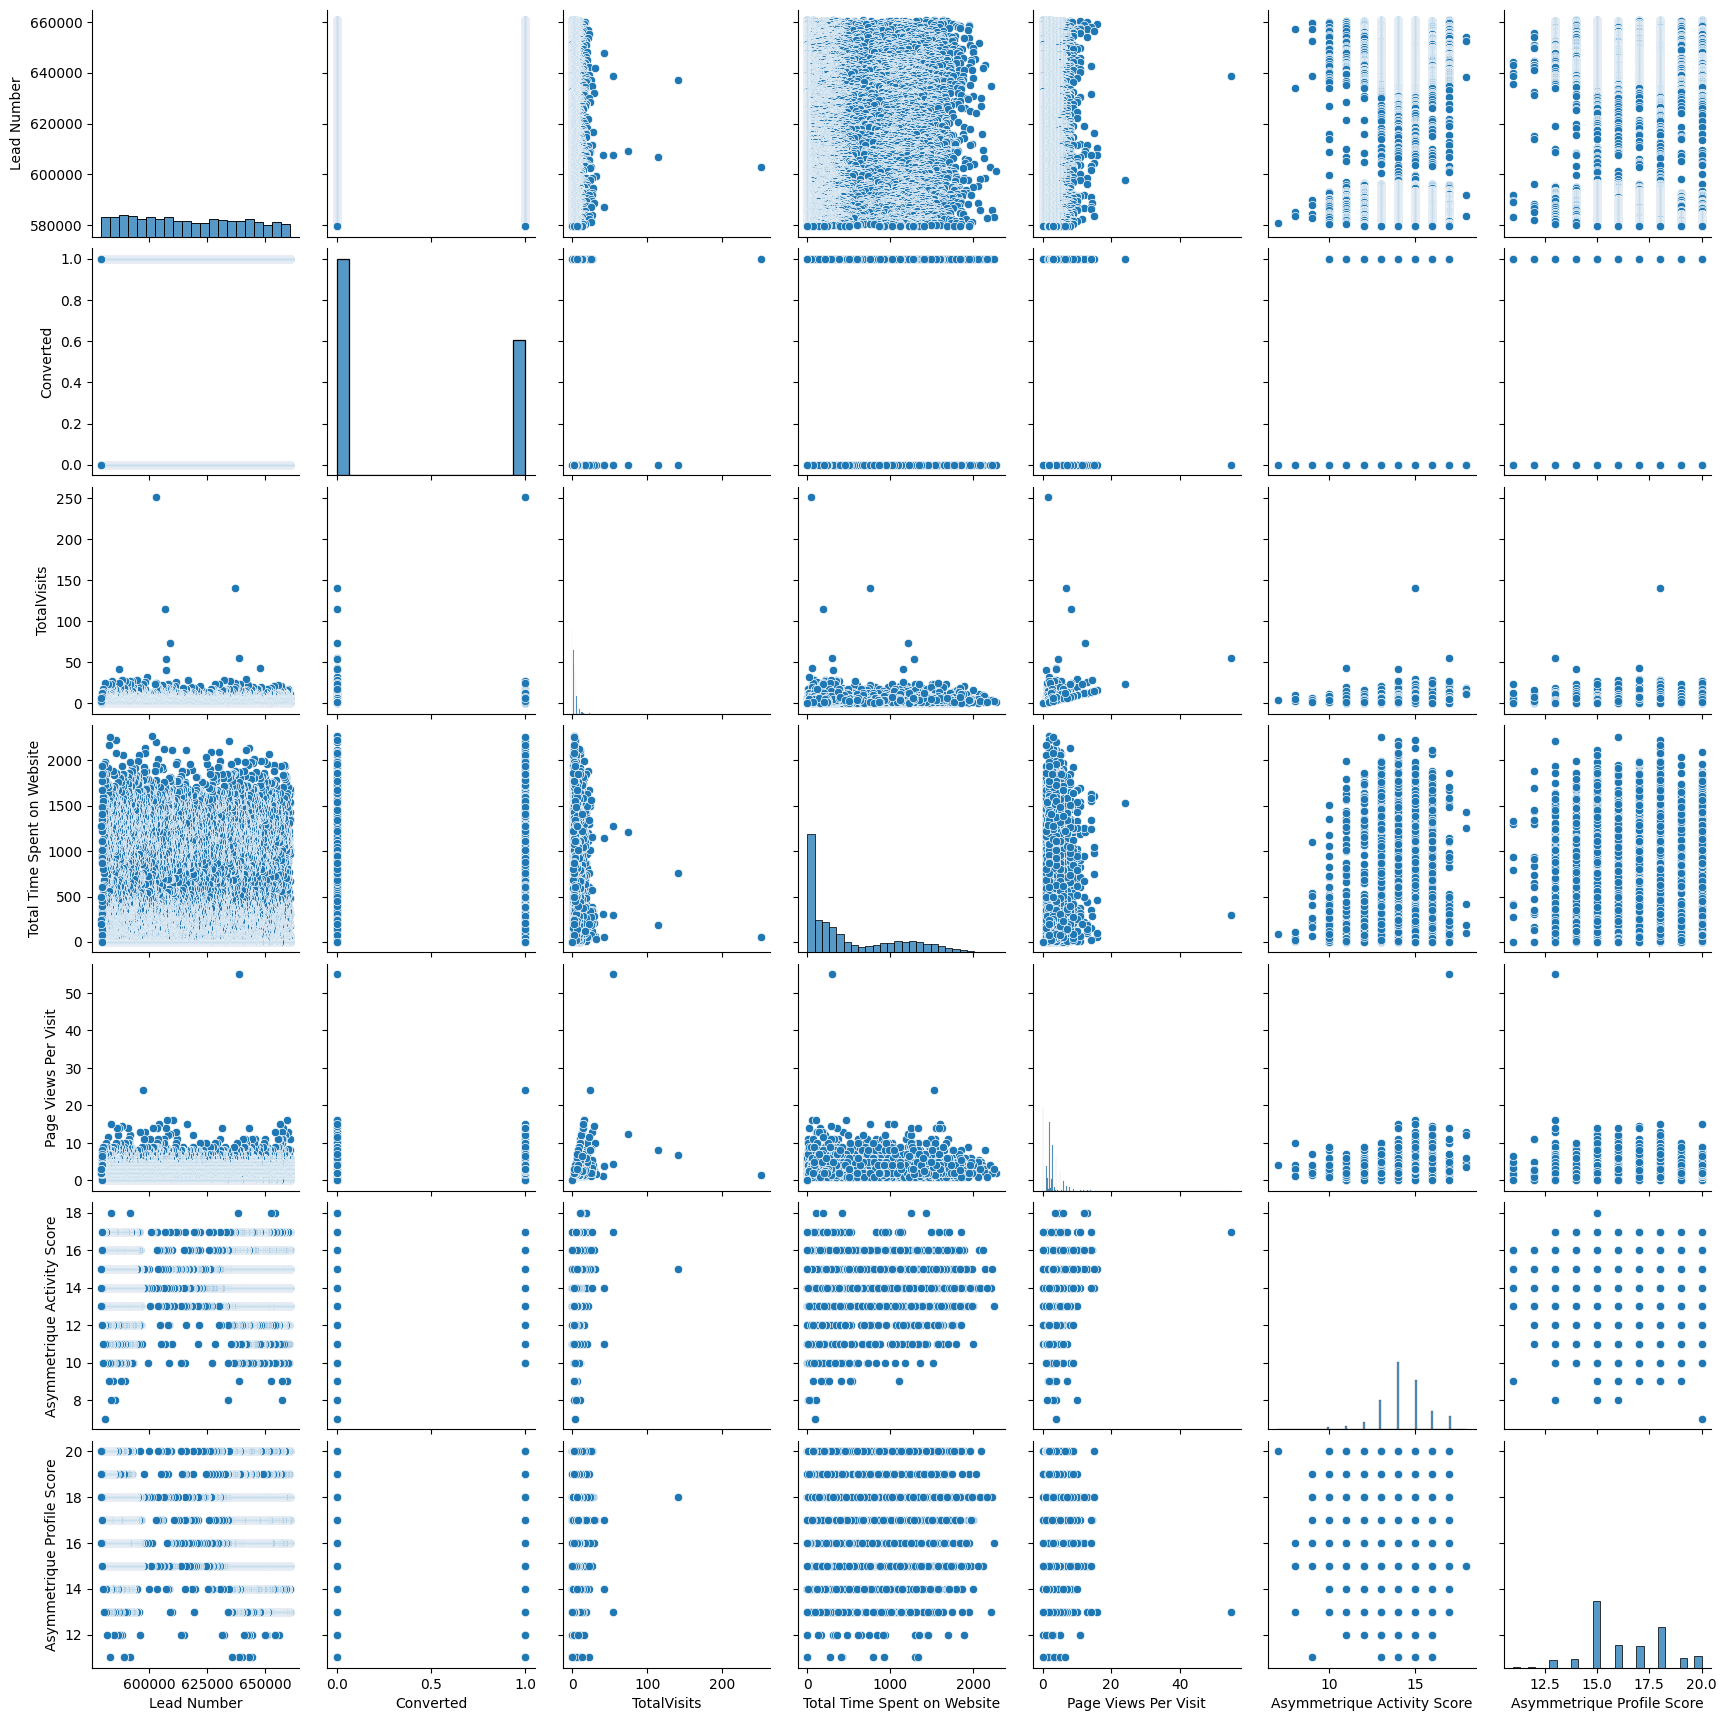

In [97]:
sns.pairplot(df)

### TotalVisits, Total Time Spent on Website, Page Views Per Visit have strong correlation with Converted 

In [98]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City','Last Notable Activity']

df=df.drop(red_cols,axis=1)

### There is Select value in some column which is basically error in our dataset

In [99]:
# column names having label 'Select'

cols=list(df.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(df[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text 

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [100]:
# Replacing 'Select' label with nan values


df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)


### Removing Null Value from data 

In [101]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Get updates on DM Content                         0.0000

### We are dropping column who have null value > 35%

In [102]:
df = df.drop(['How did you hear about X Education','Lead Profile','Specialization','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Tags'],axis=1)  

In [103]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Lead Origin                                       0.000000
Magazine                                          0.000000
Search                                            0.000000
Total Time Spent on Website                       0.0000

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [105]:
df.sample(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
4263,API,Google,No,No,1,2.0,1594,1.0,SMS Sent,NaN,NaN,No,No,No,No,No,No,No,No,No,No
4075,API,Organic Search,No,No,0,8.0,789,8.0,Email Opened,NaN,NaN,No,No,No,No,No,No,No,No,No,No
8495,Landing Page Submission,Direct Traffic,No,No,1,6.0,1835,6.0,Email Opened,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No
197,API,Google,No,No,0,2.0,78,1.0,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No
3997,Landing Page Submission,Direct Traffic,No,No,0,3.0,1231,3.0,Page Visited on Website,Other,Better Career Prospects,No,No,No,No,No,No,No,No,No,No
6074,API,Olark Chat,No,No,1,0.0,0,0.0,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No
743,Landing Page Submission,Google,No,No,0,1.0,583,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No
3520,Landing Page Submission,Direct Traffic,No,No,1,5.0,1106,5.0,SMS Sent,NaN,NaN,No,No,No,No,No,No,No,No,No,No
4629,Landing Page Submission,Google,No,No,1,5.0,763,5.0,SMS Sent,NaN,NaN,No,No,No,No,No,No,No,No,No,No
2047,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No


### Selecting only Object datatype column from dataset

In [106]:
df_obj = df.select_dtypes(include=['object'])

In [107]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_filled_arr = imputer.fit_transform(df_obj)


In [108]:
df_filled_arr

array([['API', 'Olark Chat', 'No', ..., 'No', 'No', 'No'],
       ['API', 'Organic Search', 'No', ..., 'No', 'No', 'No'],
       ['Landing Page Submission', 'Direct Traffic', 'No', ..., 'No',
        'No', 'No'],
       ...,
       ['Landing Page Submission', 'Direct Traffic', 'Yes', ..., 'No',
        'No', 'No'],
       ['Landing Page Submission', 'Google', 'No', ..., 'No', 'No', 'No'],
       ['Landing Page Submission', 'Direct Traffic', 'No', ..., 'No',
        'No', 'No']], dtype=object)

In [109]:
df_filled = pd.DataFrame(df_filled_arr, columns=df_obj.columns)

In [110]:
df_filled.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
dtype: int64

#### Updating this object column back to the main dataframe

In [111]:
df.update(df_filled)

In [112]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                            0
Receive More Updates About Our Courses        

### Filling null value of numerical column with Median value

In [113]:
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [114]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

### Unique value from each Object column

In [115]:
df_obj = df.select_dtypes(include=['object'])
j = 0
for i in df_obj:
    print(df_obj.columns[j])
    print(df_obj[f'{i}'].unique())
    j += 1

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
What is your current occupation
['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 'Housewife']
What matters most to you in choosing a course
['Better Caree

### In Lead Source Google and google are same values but due to lower case they are treated as different values so converting all values in upper case

In [116]:
df['Lead Source'].value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [117]:
df['Lead Source']=df['Lead Source'].apply(lambda x:x.capitalize())

df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: count, dtype: int64

### Converting all Yes and No values of Object column into 1 and 0 respectively

In [118]:
df = df.applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)

In [119]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

### Converting remaining object column into numeric data using LabelEncoder

In [121]:
df_obj = df.select_dtypes(include=['object'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Last Activity                                  9240 non-null   object
 3   What is your current occupation                9240 non-null   object
 4   What matters most to you in choosing a course  9240 non-null   object
dtypes: object(5)
memory usage: 361.1+ KB


In [122]:
from sklearn.preprocessing import LabelEncoder

x = df_obj.columns
obj_col = list(x)

le = LabelEncoder()

for column in obj_col:
    df[column] = le.fit_transform(df[column])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   int32  
 1   Lead Source                                    9240 non-null   int32  
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   int32  
 9   What is your current occupation                9240 

### Correlation of all columns with Converted(Target) column

In [124]:
# Set the display.max_rows option to None to display all rows
pd.set_option('display.max_rows', None)

corr_matrix = df.corr()
print(corr_matrix["Converted"].sort_values(ascending=False))

Converted                                        1.000000
Total Time Spent on Website                      0.362483
Last Activity                                    0.224844
Lead Origin                                      0.223725
What is your current occupation                  0.214057
Lead Source                                      0.183237
TotalVisits                                      0.029119
Through Recommendations                          0.018607
Do Not Call                                      0.018581
Newspaper Article                                0.003465
Search                                          -0.002261
What matters most to you in choosing a course   -0.004727
Page Views Per Visit                            -0.005068
Digital Advertisement                           -0.005789
Newspaper                                       -0.008238
X Education Forums                              -0.008238
Do Not Email                                    -0.135580
Magazine      

<Axes: >

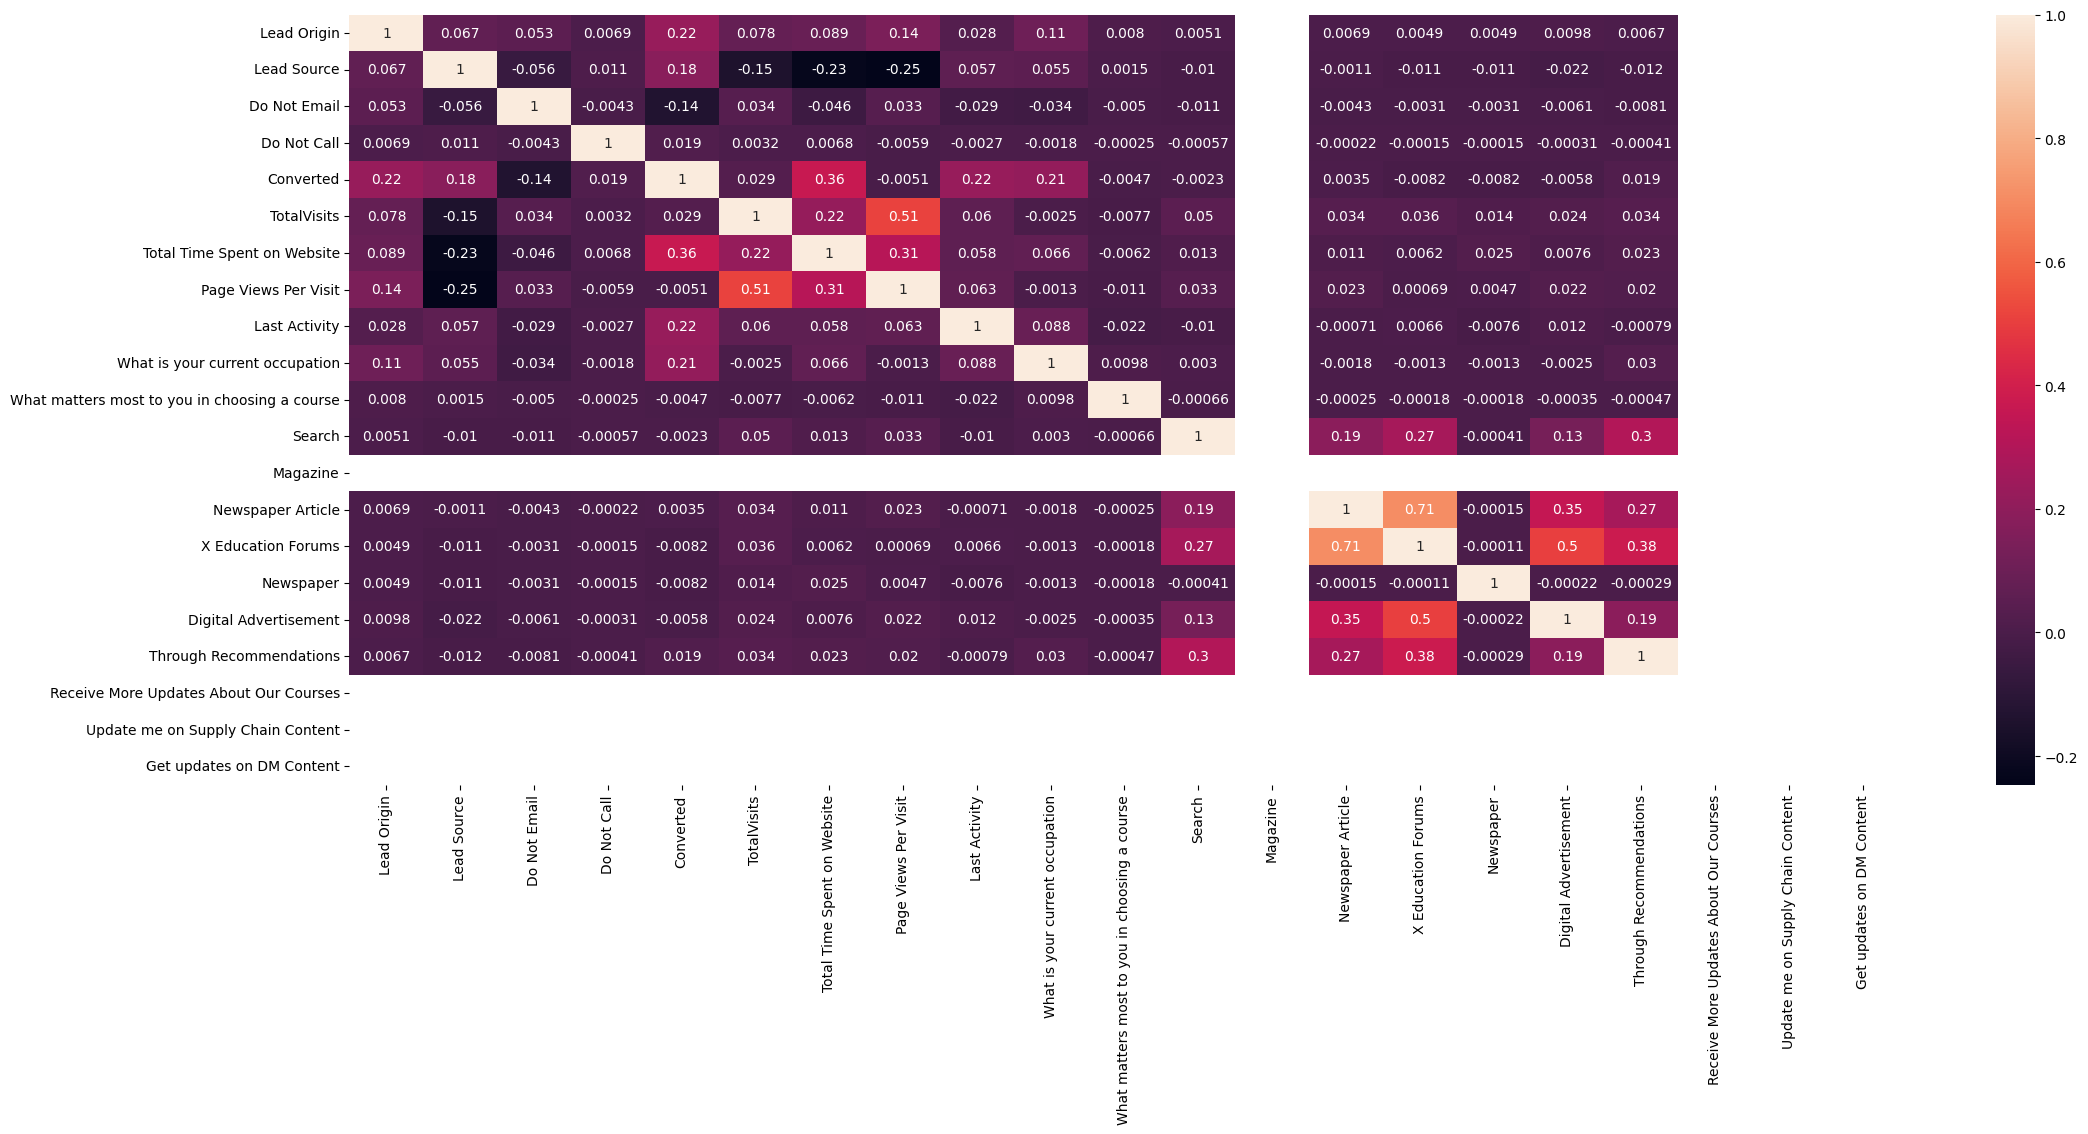

In [125]:
cm = df.corr()

plt.figure(figsize=(25,10))
sns.heatmap(cm,annot=True)

### Features Selection

### Looking at correlation matrix we select column who have correlation more than 0.2

In [129]:
X = df[['Total Time Spent on Website','Last Activity','Lead Origin','What is your current occupation','Lead Source']]
Y = df['Converted']

In [130]:
X.shape

(9240, 5)

### Spliting data into train test split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

### Model Training

## Model 1 : Logistic Regression

In [143]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [144]:
y_pred = LR.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred)

0.7714285714285715

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1412
           1       0.75      0.61      0.68       898

    accuracy                           0.77      2310
   macro avg       0.77      0.74      0.75      2310
weighted avg       0.77      0.77      0.77      2310



## Model 2 : Decision Tree Classifier

In [147]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [148]:
y_pred = DT.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred)

0.7718614718614719

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1412
           1       0.71      0.69      0.70       898

    accuracy                           0.77      2310
   macro avg       0.76      0.76      0.76      2310
weighted avg       0.77      0.77      0.77      2310



### Model 3 : Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=0)
RF.fit(X_train,y_train) 


RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [152]:
y_pred = RF.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred)

0.7805194805194805

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1412
           1       0.73      0.70      0.71       898

    accuracy                           0.78      2310
   macro avg       0.77      0.77      0.77      2310
weighted avg       0.78      0.78      0.78      2310



# Looking at above results we can say that Random Forest Classifier have best accuracy i.e. 78%